# Detection of discriminatory algorithms

### Samuel Kerr & Paul Laplace



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
adcensus=pd.read_csv("Ad.csv",sep=",")

In [4]:
adcensus.shape

(29825, 19)

In [5]:
adcensus.head()

age      workClass  fnlwgt  education  educNum       mariStat  \
0   39     Other-Govt   77516  Bachelors       13  Never-Married   
1   50  Self-Employed   83311  Bachelors       13        Married   
2   38        Private  215646    HS-grad        9    Not-Married   
3   53        Private  234721    Dropout        7        Married   
4   28        Private  338409  Bachelors       13        Married   

          occup   relationship origEthn     sex capitalGain capitalLoss  \
0         Admin  Not-in-family    White    Male       cgLow        None   
1  White-Collar        Husband    White    Male        None        None   
2   Blue-Collar  Not-in-family    White    Male        None        None   
3   Blue-Collar        Husband    Black    Male        None        None   
4  Professional           Wife    Black  Female        None        None   

   hoursWeek   nativCountry  income  LcapitalGain  LcapitalLoss ageQ  \
0         40  United-States  incLow      7.684784           0.0  Ag3   
1         13  United-States  incLow      0.000000           0.0  Ag4   
2         40  United-States  incLow      0.000000           0.0  Ag3   
3         40  United-States  incLow      0.000000           0.0  Ag5   
4         40          Other  incLow      0.000000           0.0  Ag2   

  hoursWeekQ  
0        HW2  
1        HW1  
2        HW2  
3        HW2  
4        HW2

In [6]:
adcensus.dtypes

age               int64
workClass        object
fnlwgt            int64
education        object
educNum           int64
mariStat         object
occup            object
relationship     object
origEthn         object
sex              object
capitalGain      object
capitalLoss      object
hoursWeek         int64
nativCountry     object
income           object
LcapitalGain    float64
LcapitalLoss    float64
ageQ             object
hoursWeekQ       object
dtype: object

In [7]:
adcensus.describe()

age        fnlwgt       educNum     hoursWeek  LcapitalGain  \
count  29825.000000  2.982500e+04  29825.000000  29825.000000  29825.000000   
mean      38.676144  1.898787e+05     10.159430     41.157351      0.750215   
std       13.012291  1.057528e+05      2.536119     11.808849      2.481184   
min       18.000000  1.376900e+04      1.000000      1.000000      0.000000   
25%       28.000000  1.176270e+05      9.000000     40.000000      0.000000   
50%       37.000000  1.784870e+05     10.000000     40.000000      0.000000   
75%       47.000000  2.376710e+05     13.000000     45.000000      0.000000   
max       90.000000  1.484705e+06     16.000000     99.000000     11.512925   

       LcapitalLoss  
count  29825.000000  
mean       0.356503  
std        1.597815  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        8.379539

In [8]:
adcensus.count()

age             29825
workClass       29825
fnlwgt          29825
education       29825
educNum         29825
mariStat        29825
occup           29825
relationship    29825
origEthn        29825
sex             29825
capitalGain     29825
capitalLoss     29825
hoursWeek       29825
nativCountry    29825
income          29825
LcapitalGain    29825
LcapitalLoss    29825
ageQ            29825
hoursWeekQ      29825
dtype: int64

-> Pas de données manquantes.

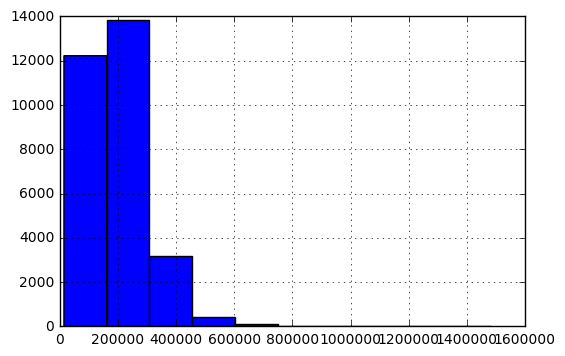

In [8]:
adcensus["fnlwgt"].hist()
plt.show()

-> Statut pas clair de fnlwgt, on peut laisser de côté cette var pour nos modèles.

In [9]:
adcensus=adcensus.drop(["fnlwgt"],axis=1)

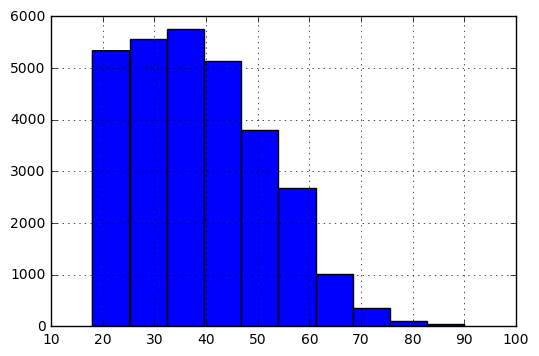

In [10]:
adcensus["age"].hist()
plt.show()

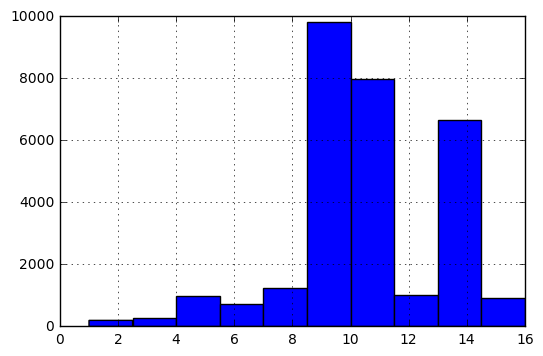

In [11]:
adcensus["educNum"].hist()
plt.show()

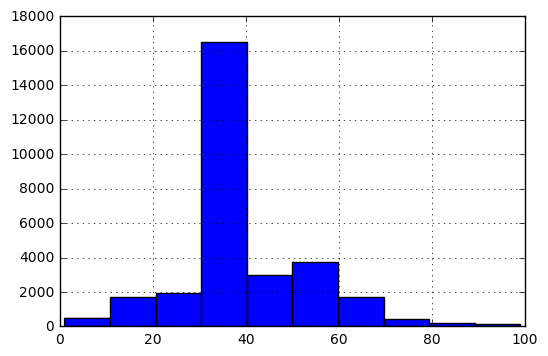

In [12]:
adcensus["hoursWeek"].hist()
plt.show()

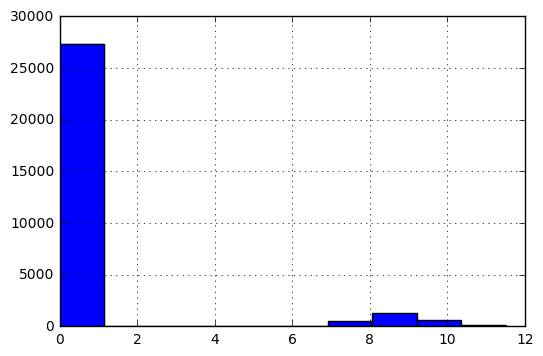

In [13]:
adcensus["LcapitalGain"].hist()
plt.show()

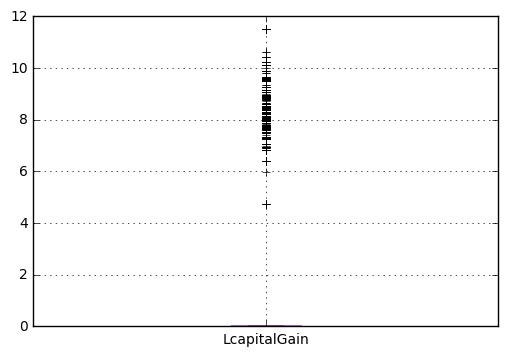

In [14]:
adcensus.boxplot('LcapitalGain',return_type='axes')
plt.show()

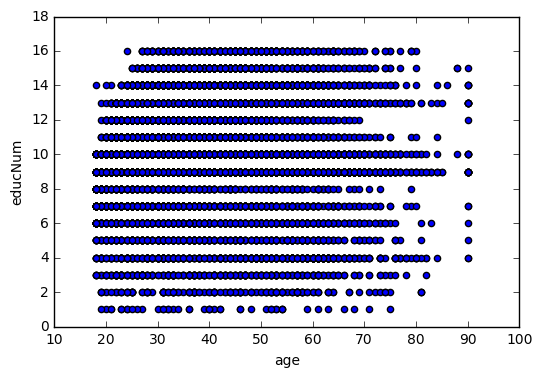

In [15]:
adcensus.plot(kind="scatter",x="age",y="educNum")
plt.show()

In [16]:
tab=pd.crosstab(adcensus["education"],adcensus["educNum"])
print(tab)

educNum      1    2    3    4    5    6    7    8     9     10    11    12  \
education                                                                    
Associates    0    0    0    0    0    0    0    0     0     0  1307  1008   
Bachelors     0    0    0    0    0    0    0    0     0     0     0     0   
Doctorate     0    0    0    0    0    0    0    0     0     0     0     0   
Dropout      45  151  287  554  432  714  894  344     0     0     0     0   
HS-Graduate   0    0    0    0    0    0    0    0     0  6674     0     0   
HS-grad       0    0    0    0    0    0    0    0  9829     0     0     0   
Masters       0    0    0    0    0    0    0    0     0     0     0     0   
Prof-School   0    0    0    0    0    0    0    0     0     0     0     0   

educNum        13    14   15   16  
education                          
Associates      0     0    0    0  
Bachelors    5043     0    0    0  
Doctorate       0     0    0  375  
Dropout         0     0    0    0  
HS-

In [17]:
tab=pd.crosstab(adcensus["relationship"],adcensus["sex"])
print(tab)

sex             Female   Male
relationship                 
Husband              1  12459
Not-in-family     3563   4150
Other-relative     379    493
Own-child         1825   2343
Unmarried         2459    747
Wife              1405      1


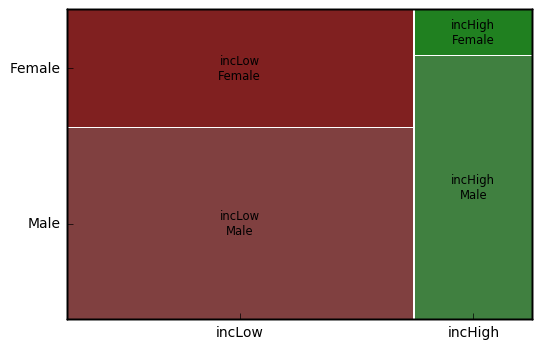

sex      Female   Male
income                
incHigh    1112   6395
incLow     8520  13798


In [18]:
mosaic(adcensus,["income","sex"])
plt.show()
tab=pd.crosstab(adcensus["income"],adcensus["sex"])
print(tab)

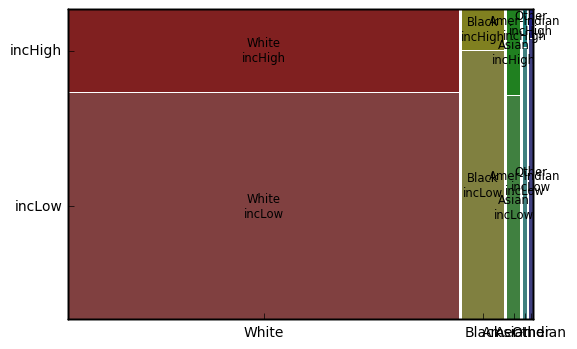

income       incHigh  incLow
origEthn                    
Amer-Indian       34     248
Asian            248     646
Black            366    2424
Other             21     206
White           6838   18794


In [19]:
mosaic(adcensus,["origEthn","income"])
plt.show()
tab=pd.crosstab(adcensus["origEthn"],adcensus["income"])
print(tab)

On a une redondance dans les données entre statut marital, genre avec relationship. On supprime donc relationship.

In [20]:
adcensus["Child"]=pd.DataFrame(adcensus["relationship"]=="Own-child",dtype=object)
adcensus.head(3)

age      workClass  education  educNum       mariStat         occup  \
0   39     Other-Govt  Bachelors       13  Never-Married         Admin   
1   50  Self-Employed  Bachelors       13        Married  White-Collar   
2   38        Private    HS-grad        9    Not-Married   Blue-Collar   

    relationship origEthn   sex capitalGain capitalLoss  hoursWeek  \
0  Not-in-family    White  Male       cgLow        None         40   
1        Husband    White  Male        None        None         13   
2  Not-in-family    White  Male        None        None         40   

    nativCountry  income  LcapitalGain  LcapitalLoss ageQ hoursWeekQ  Child  
0  United-States  incLow      7.684784           0.0  Ag3        HW2  False  
1  United-States  incLow      0.000000           0.0  Ag4        HW1  False  
2  United-States  incLow      0.000000           0.0  Ag3        HW2  False

In [21]:
adcensus=adcensus.drop(["relationship"],axis=1)

On a également une redondance entre l'origine ethnique et le pays d'origine. On supprime donc le pays d'origine, et on crée deux classes pour l'origine ethnique: caucasien, non-caucasien.

In [22]:
adcensus=adcensus.drop(["nativCountry"],axis=1)
adcensus.head(3)

age      workClass  education  educNum       mariStat         occup  \
0   39     Other-Govt  Bachelors       13  Never-Married         Admin   
1   50  Self-Employed  Bachelors       13        Married  White-Collar   
2   38        Private    HS-grad        9    Not-Married   Blue-Collar   

  origEthn   sex capitalGain capitalLoss  hoursWeek  income  LcapitalGain  \
0    White  Male       cgLow        None         40  incLow      7.684784   
1    White  Male        None        None         13  incLow      0.000000   
2    White  Male        None        None         40  incLow      0.000000   

   LcapitalLoss ageQ hoursWeekQ  Child  
0           0.0  Ag3        HW2  False  
1           0.0  Ag4        HW1  False  
2           0.0  Ag3        HW2  False

In [23]:
adcensus.loc[adcensus["origEthn"]!='White',"origEthn"]="CaucNo"
adcensus.loc[adcensus["origEthn"]=='White',"origEthn"]="CaucYes"

In [24]:
adcensus["origEthn"].value_counts()

CaucYes    25632
CaucNo      4193
Name: origEthn, dtype: int64

In [9]:
adcensus["sex"].value_counts()

Male      20193
Female     9632
Name: sex, dtype: int64

#### Disparate impact initial

In [25]:
tab=pd.crosstab(adcensus.sex,adcensus.income)
probaF_incH=tab.iloc[0,0]/sum(tab.iloc[0,:])
probaM_incH=tab.iloc[1,0]/sum(tab.iloc[1,:])
print("Disparate impact gender: ", probaF_incH/probaM_incH)

tab=pd.crosstab(adcensus.origEthn,adcensus.income)
proba_noCauc_incH=tab.iloc[0,0]/sum(tab.iloc[0,:])
proba_Cauc_incH=tab.iloc[1,0]/sum(tab.iloc[1,:])
print("Disparate impact ethnic origin: ", proba_noCauc_incH/proba_Cauc_incH)

Disparate impact gender:  0.36454287117
Disparate impact ethnic origin:  0.598073628892


### Régression logistique initiale

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
import time

In [27]:
adcensusDum=pd.get_dummies(adcensus[["workClass","education","mariStat","occup","origEthn","sex","capitalGain","capitalLoss","ageQ","hoursWeekQ","Child"]])
adcensusQuant=adcensus[["age","educNum","hoursWeek","LcapitalGain","LcapitalLoss"]]
adReg=pd.concat([adcensusDum,adcensusQuant],axis=1)
Y=adcensus["income"]

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(adReg,Y,test_size=0.2,random_state=11)

In [29]:
tps0=time.clock()

# Optimisation du paramètre de pénalisation
# Grille de valeurs
param=[{"C":[0.1, 0.15,0.2,0.25,0.3]}]
logit = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=10,n_jobs=-1)
logitOpt=logit.fit(X_train, Y_train)

# paramètre optimal
logitOpt.best_params_["C"]


tps1=(time.clock()-tps0)/60
print("Temps logit = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                              1.-logitOpt.best_score_,logitOpt.best_params_))

Temps logit = 0.085596, Meilleur taux = 0.151928, Meilleur paramètre = {'C': 0.3}


In [30]:
# erreur sur l'échantillon test
print('Erreur sur l\'échantillon test:',1-logitOpt.score(X_test, Y_test))

Erreur sur l'échantillon test: 0.152891869237


In [31]:
# Prévision
y_chap = logitOpt.predict(X_test)
# matrice de confusion
print('Matrice de confusion')
table=pd.crosstab(y_chap,Y_test)
print(table)

Matrice de confusion
income   incHigh  incLow
row_0                   
incHigh      924     308
incLow       604    4129


#### Disparate impact

In [126]:
tab=pd.crosstab(X_test.sex_Male.values==1,y_chap)
probaF_incH=tab.iloc[0,0]/sum(tab.iloc[0,:])
probaM_incH=tab.iloc[1,0]/sum(tab.iloc[1,:])
Dimpact_ychap=probaF_incH/probaM_incH
print("Disparate impact gender: ", Dimpact_ychap)
tab

Disparate impact gender:  0.207328813189


col_0  incHigh  incLow
row_0                 
False      108    1781
True      1124    2952

In [127]:
tab=pd.crosstab(X_test.origEthn_CaucYes.values==1,y_chap)
proba_noCauc_incH=tab.iloc[0,0]/sum(tab.iloc[0,:])
proba_Cauc_incH=tab.iloc[1,0]/sum(tab.iloc[1,:])
print("Disparate impact ethnic origin: ", proba_noCauc_incH/proba_Cauc_incH)

Disparate impact ethnic origin:  0.510343368665


In [46]:
# Coefficients
print('Coefficients de la régression logistique: ')
LogisticRegression(penalty="l1",C=logitOpt.best_params_['C']).fit(X_train, Y_train).coef_

Coefficients de la régression logistique: 


array([[-0.40105888,  0.        ,  0.15270671,  0.        ,  0.29070179,
         0.33370916,  0.        , -0.33021833,  0.44323935,  0.12025091,
         0.27102352, -0.00956677, -0.36419338, -1.81702533,  0.6504275 ,
         0.45890441,  0.        ,  0.37995223,  0.72604632, -0.14568503,
         0.        ,  0.14381493,  1.1575992 , -0.28459252,  0.19581866,
         0.        ,  0.12500832,  0.        ,  0.        ,  0.        ,
         4.6585892 ,  0.51171127,  0.        ,  0.78034507,  1.94472854,
         0.94576512,  0.32453571, -0.04667814,  0.        ,  0.86536385,
         0.39131365,  0.        ,  0.        ,  0.67005983,  0.01131542,
        -0.20914053, -0.00480065, -0.63110363, -0.13348267]])

In [36]:
model = LogisticRegressionCV(Cs=10,cv=5, penalty="l1",
        n_jobs=-1,random_state=13,solver="liblinear").fit(X_train,Y_train)
m_log_alphas = -np.log10(model.Cs_)

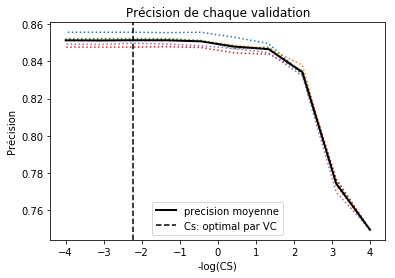

In [37]:
plt.figure()
plt.plot(m_log_alphas, model.scores_['incLow'].T, ':')
plt.plot(m_log_alphas, model.scores_['incLow'].T.mean(axis=-1), 'k',
         label='precision moyenne', linewidth=2)
plt.axvline(-np.log10(model.C_), linestyle='--', color='k',
            label='Cs: optimal par VC')
plt.legend()
plt.xlabel('-log(CS)')
plt.ylabel(u'Précision')
plt.title(u'Précision de chaque validation')
plt.show()

#### Débiaisage methode

-> On utilise un seuil différent de prédiction pour les femmes dans la régression afin de faire de la discrimination positive.

In [32]:
X_test_M=pd.DataFrame.copy(X_test[X_test.sex_Male==1],deep=True)
X_test_F=pd.DataFrame.copy(X_test[X_test.sex_Male==0],deep=True)
Y_test_M=pd.DataFrame.copy(Y_test[X_test.sex_Male==1],deep=True)
Y_test_F=pd.DataFrame.copy(Y_test[X_test.sex_Male==0],deep=True)

X_train_F=pd.DataFrame.copy(X_train[X_train.sex_Male==0],deep=True)
Y_train_F=pd.DataFrame.copy(Y_train[X_train.sex_Male==0],deep=True)
X_train_M=pd.DataFrame.copy(X_train[X_train.sex_Male==1],deep=True)
Y_train_M=pd.DataFrame.copy(Y_train[X_train.sex_Male==1],deep=True)

y_chap_M=logitOpt.predict(X_test_M)
y_chap_F=logitOpt.predict(X_test_F)

seuil_F=0.4
y_chap_F_seuil_proba=logitOpt.predict_proba(X_test_F)[:,0]

y_chap_F_seuil = np.copy(y_chap_F)
y_chap_F_seuil[y_chap_F_seuil_proba >= seuil_F] = 'incHigh'
y_chap_F_seuil[y_chap_F_seuil_proba < seuil_F] = 'incLow'

tableM=pd.crosstab(y_chap_M,Y_test_M)
tableF=pd.crosstab(y_chap_F_seuil,Y_test_F)

erreur=(tableM.iloc[0,1]+tableM.iloc[1,0]+tableF.iloc[0,1]+tableF.iloc[1,0])/(sum(tableM.iloc[:,0])+sum(tableM.iloc[:,1])+sum(tableF.iloc[:,0])+sum(tableF.iloc[:,1]))
print(erreur)

tabF=pd.crosstab(X_test_F.sex_Female.values==1,y_chap_F_seuil)
probaF_incH=tabF.iloc[0,0]/sum(tabF.iloc[0,:])
tabM=pd.crosstab(X_test_M.sex_Male,y_chap_M)
probaM_incH=tabM.iloc[0,0]/sum(tabM.iloc[0,:])
print(probaF_incH/probaM_incH)

print('Le nbe de femmes passées à incHigh avec le seuil égal à',seuil_F,'est de :',len(y_chap_F)-np.sum(y_chap_F_seuil==y_chap_F))

0.153562447611
0.276438417585
Le nbe de femmes passées à incHigh avec le seuil égal à 0.4 est de : 36


In [90]:
vec_seuil=np.linspace(0.1,0.5,7)
disparate=[]
errors=[]

for i in vec_seuil:
    y_chap_F_seuil_proba=logitOpt.predict_proba(X_test_F)[:,0]

    y_chap_F_seuil = np.copy(y_chap_F)
    y_chap_F_seuil[y_chap_F_seuil_proba >= i] = 'incHigh'
    y_chap_F_seuil[y_chap_F_seuil_proba < i] = 'incLow'

    tableM=pd.crosstab(y_chap_M,Y_test_M)
    tableF=pd.crosstab(y_chap_F_seuil,Y_test_F)

    erreur=(tableM.iloc[0,1]+tableM.iloc[1,0]+tableF.iloc[0,1]+tableF.iloc[1,0])/(sum(tableM.iloc[:,0])+sum(tableM.iloc[:,1])+sum(tableF.iloc[:,0])+sum(tableF.iloc[:,1]))

    tabF=pd.crosstab(X_test_F.sex_Female.values==1,y_chap_F_seuil)
    probaF_incH=tabF.iloc[0,0]/sum(tabF.iloc[0,:])
    tabM=pd.crosstab(X_test_M.sex_Male,y_chap_M)
    probaM_incH=tabM.iloc[0,0]/sum(tabM.iloc[0,:])

    disparate.append(probaF_incH/probaM_incH)
    errors.append(erreur)

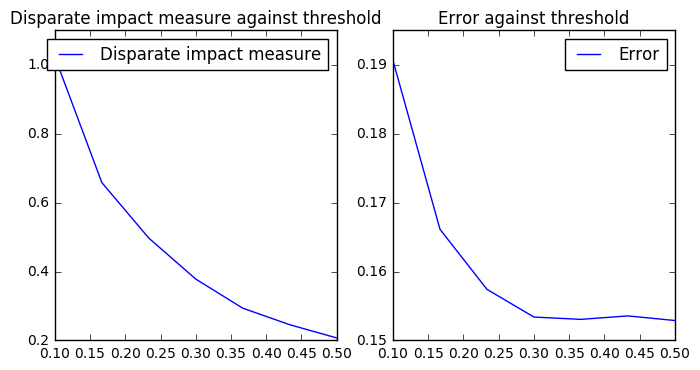

In [104]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Disparate impact measure against threshold")
plt.plot(vec_seuil,disparate,label="Disparate impact measure")
plt.legend()
plt.subplot(1,2,2)
plt.title("Error against threshold")
plt.plot(vec_seuil,errors,label="Error")
plt.legend()
plt.show()

### Random Forest initial

In [29]:
from sklearn.ensemble import RandomForestClassifier 

In [38]:
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500,criterion='gini', max_depth=None,
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features='auto', max_leaf_nodes=None,
                                bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train,Y_train)
print(1-rfFit.oob_score_)

0.160477787091


In [39]:
# erreur de prévision sur le test
print('Erreur sur l\'échantillon test:',1-rfFit.score(X_test,Y_test))

Erreur sur l'échantillon test: 0.162112321878


In [40]:
# optimisation du paramètre
tps0=time.clock()
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, Y_train)
# paramètre optimal
tps1=(time.clock()-tps0)/60
print("Temps r forest = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                                    1. - rfOpt.best_score_,rfOpt.best_params_))

Temps r forest = 0.131290, Meilleur taux = 0.162364, Meilleur paramètre = {'max_features': 9}


In [41]:
# erreur de prévision sur le test
print('Erreur sur l\'échantillon test:',1-rfOpt.score(X_test,Y_test))

Erreur sur l'échantillon test: 0.161944677284


In [42]:
# prévision
y_chap_rf = rfFit.predict(X_test)
# matrice de confusion
print('Matrice de confusion:')
table=pd.crosstab(y_chap_rf,Y_test)
print(table)

Matrice de confusion:
income   incHigh  incLow
row_0                   
incHigh      937     376
incLow       591    4061


In [47]:
rf= RandomForestClassifier(n_estimators=100,max_features=2)
rfFit=rf.fit(X_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(20):
    print(X_train.columns[indices[f]], importances[indices[f]])

age 0.19235261772
hoursWeek 0.0943108821685
mariStat_Married 0.0694524994936
educNum 0.0593304735754
LcapitalGain 0.0526937755702
mariStat_Never-Married 0.039098803327
capitalGain_cgHigh 0.0292015558885
mariStat_Not-Married 0.0248217243368
capitalGain_None 0.0217950320324
LcapitalLoss 0.0208290947464
occup_White-Collar 0.020313232369
occup_Blue-Collar 0.0201032085579
hoursWeekQ_HW3 0.019656996376
ageQ_Ag1 0.0191704969704
sex_Male 0.0169812405002
education_Bachelors 0.0161039179585
occup_Professional 0.0158549702425
sex_Female 0.0155229901822
workClass_Private 0.014285175166
ageQ_Ag4 0.0135568884573


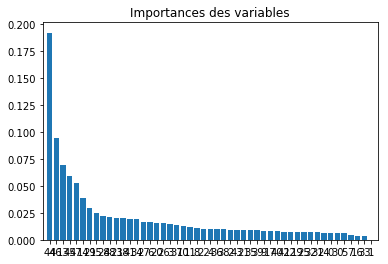

In [48]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### Disparate impact

In [43]:
tab=pd.crosstab(X_test.sex_Male.values==1,y_chap_rf)
probaW=tab.iloc[1,0]/sum(tab.iloc[1,:])
probaO=tab.iloc[0,0]/sum(tab.iloc[0,:])
print("Disparate impact gender: ", probaO/probaW)


tab=pd.crosstab(X_test.origEthn_CaucYes.values==1,y_chap_rf)
probaW=tab.iloc[1,0]/sum(tab.iloc[1,:])
probaO=tab.iloc[0,0]/sum(tab.iloc[0,:])
print("Disparate impact ethnic origin: ", probaO/probaW)

Disparate impact gender:  0.297299057849
Disparate impact ethnic origin:  0.566005993577


### Courbes ROC

In [60]:
from sklearn.metrics import roc_curve
listMethod=[["RF",rfFit],["Logit",logitOpt]]

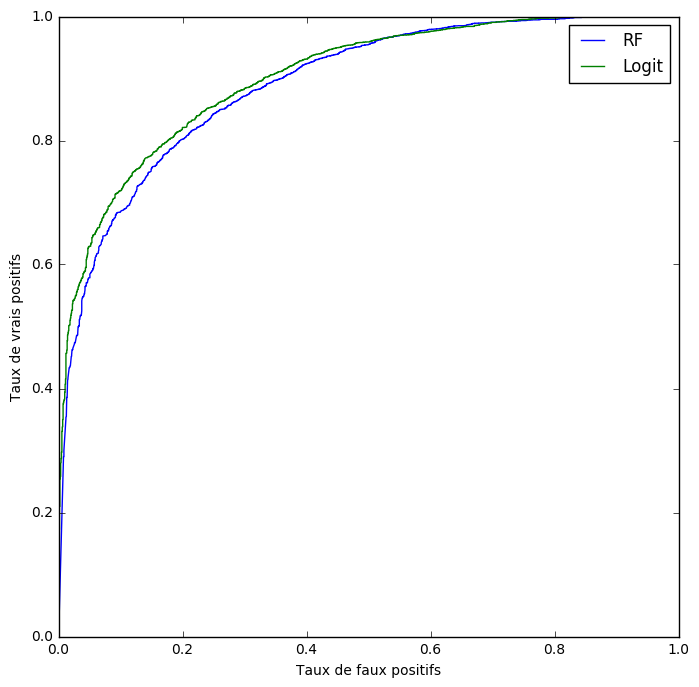

In [62]:
plt.figure(figsize=(8,8))
for method in enumerate(listMethod):
    probas_ = method[1][1].fit(X_train, Y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test,probas_[:,1], pos_label="incLow")
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0]),
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

# Testing

## Testing avec le sexe

On inverse le sexe des individus, et on s'intéresse à la prévision obtenue. On la compare par exemple à la prévision initiale y_chap, et on pourra ainsi voir si lorsqu'on change la variable supposée sensible "sexe" pour un individu donné sans toucher à ses autres caractéristiques, la prévision est modifiée (i.e son salaire prédit change).

### Régression logistique

In [64]:
X_test_prime=pd.DataFrame.copy(X_test,deep=True)

X_test_prime.loc[X_test.sex_Female==1, 'sex_Female']=0
X_test_prime.loc[X_test.sex_Female==0, 'sex_Female']=1
X_test_prime.loc[X_test.sex_Male==1,'sex_Male']=0
X_test_prime.loc[X_test.sex_Male==0, 'sex_Male']=1

y_chap_prime = logitOpt.predict(X_test_prime)

In [65]:
pd.crosstab(y_chap,y_chap_prime)

col_0    incHigh  incLow
row_0                   
incHigh     1149      83
incLow        12    4721

In [66]:
tab_discrim=pd.crosstab(y_chap,[X_test.sex_Male.values==1,y_chap_prime])
# False femme
# True homme
tab_discrim

col_0     False          True        
col_1   incHigh incLow incHigh incLow
row_0                                
incHigh     108      0    1041     83
incLow       12   1769       0   2952

In [67]:
femmes_discrim=tab_discrim.iloc[1,0]
hommes_discrim=tab_discrim.iloc[0,3]
print("Il y a",femmes_discrim, "femmes qui passent d'une prévision faible à élevée, lorsqu'elles deviennent homme.")
print("Il y a",hommes_discrim, "hommes qui passent d'une prévision élevée à faible, lorsqu'ils deviennent femme.")

Il y a 12 femmes qui passent d'une prévision faible à élevée, lorsqu'elles deviennent homme.
Il y a 83 hommes qui passent d'une prévision élevée à faible, lorsqu'ils deviennent femme.


In [73]:
dif=(y_chap==y_chap_prime)
index = np.where(dif==0)[0]
y_chap_new=np.copy(y_chap)
indiceFemme=(np.where((y_chap[index]=='incLow')==1)[0]) #puisque ici seulement des F passant de incLow à incHigh
y_chap_new[index[indiceFemme]]='incHigh'

#### Disparate impact débiaisé

-> Une manière de débiaiser, basique, proposée ici. D'après le testing, on a 12 femmes qui passent d'une prévision faible à élevée, lorsqu'elles deviennent homme, donc on fait de la discrimination positive, en les considérant comme prédites à incHigh désormais.

In [75]:
tab=pd.crosstab(X_test.sex_Male.values==1,y_chap_new)
probaF_incH=tab.iloc[0,0]/sum(tab.iloc[0,:])
probaM_incH=tab.iloc[1,0]/sum(tab.iloc[1,:])
Dimpact_debiais1=probaF_incH/probaM_incH
print("Disparate Impact pour notre premier débiaisage: ", Dimpact_debiais1)

Disparate Impact pour notre premier débiaisage:  0.230365347988


### Random forest

In [76]:
y_chap_rfprime = rfFit.predict(X_test_prime)
#Matrice de confusion
pd.crosstab(y_chap_rf,y_chap_rfprime)

col_0    incHigh  incLow
row_0                   
incHigh     1031     299
incLow       316    4319

In [77]:
tab_discrim=pd.crosstab(y_chap_rf,[X_test.sex_Male.values==1,y_chap_rfprime])
# False femme
# True homme
tab_discrim

col_0     False          True        
col_1   incHigh incLow incHigh incLow
row_0                                
incHigh     117     43     914    256
incLow       53   1676     263   2643

In [78]:
femmes_discrim=tab_discrim.iloc[1,0]
hommes_discrim=tab_discrim.iloc[0,3]
print("Il y a",femmes_discrim, "femmes qui passent d'une prévision faible à élevée, lorsqu'elles deviennent homme.")
print("Il y a",hommes_discrim, "hommes qui passent d'une prévision élevée à faible, lorsqu'ils deviennent femme.")

Il y a 53 femmes qui passent d'une prévision faible à élevée, lorsqu'elles deviennent homme.
Il y a 256 hommes qui passent d'une prévision élevée à faible, lorsqu'ils deviennent femme.


## Testing avec l'origine

### Régression Logistique

In [79]:
X_test_prime=pd.DataFrame.copy(X_test,deep=True)

X_test_prime.loc[X_test.origEthn_CaucNo==1, 'origEthn_CaucNo']=0
X_test_prime.loc[X_test.origEthn_CaucNo==0, 'origEthn_CaucNo']=1
X_test_prime.loc[X_test.origEthn_CaucYes==1,'origEthn_CaucYes']=0
X_test_prime.loc[X_test.origEthn_CaucYes==0, 'origEthn_CaucYes']=1

y_chap_prime = logitOpt.predict(X_test_prime)

In [80]:
tab_discrim=pd.crosstab(y_chap,[X_test.origEthn_CaucYes.values==1,y_chap_prime])
# False Non Caucasien
# True Caucasien
tab_discrim

col_0     False          True        
col_1   incHigh incLow incHigh incLow
row_0                                
incHigh      99      0    1003    130
incLow        8    765       0   3960

In [81]:
nonCauc=tab_discrim.iloc[1,0]
Cauc=tab_discrim.iloc[0,3]
print("Il y a", nonCauc, "non caucasiens qui passent d'une prévision faible à élevée, lorsqu'ils deviennent caucasien.")
print("Il y a",Cauc, "caucasiens qui passent d'une prévision élevée à faible, lorsqu'ils deviennent non caucasien.")

Il y a 8 non caucasiens qui passent d'une prévision faible à élevée, lorsqu'ils deviennent caucasien.
Il y a 130 caucasiens qui passent d'une prévision élevée à faible, lorsqu'ils deviennent non caucasien.


#### Débiaisage

In [86]:
dif=(y_chap==y_chap_prime)
index = np.where(dif==0)[0]
y_chap_new=np.copy(y_chap)
indice_noCauc=(np.where((y_chap[index]=='incLow')==1)[0])
y_chap_new[index[indice_noCauc]]='incHigh'

In [88]:
tab=pd.crosstab(X_test.origEthn_CaucYes==1,y_chap_new)
probaF_incH=tab.iloc[0,0]/sum(tab.iloc[0,:])
probaM_incH=tab.iloc[1,0]/sum(tab.iloc[1,:])
Dimpact_debiais1=probaF_incH/probaM_incH
print("Disparate Impact pour notre premier débiaisage: ", Dimpact_debiais1)

Disparate Impact pour notre premier débiaisage:  0.55158323684


### Random Forest

In [89]:
y_chap_rfprime = rfFit.predict(X_test_prime)
pd.crosstab(y_chap_rf,y_chap_rfprime)

col_0    incHigh  incLow
row_0                   
incHigh     1024     306
incLow       192    4443

In [91]:
tab_discrim=pd.crosstab(y_chap_rf,[X_test.origEthn_CaucYes.values==1,y_chap_rfprime])
# False non Cauc
# True Cauc
tab_discrim

col_0     False          True        
col_1   incHigh incLow incHigh incLow
row_0                                
incHigh      96     22     928    284
incLow       36    718     156   3725

In [92]:
nonCauc=tab_discrim.iloc[1,0]
Cauc=tab_discrim.iloc[0,3]
print("Il y a", nonCauc, "non caucasiens qui passent d'une prévision faible à élevée, lorsqu'ils deviennent caucasien.")
print("Il y a",Cauc, "caucasiens qui passent d'une prévision élevée à faible, lorsqu'ils deviennent non caucasien.")

Il y a 36 non caucasiens qui passent d'une prévision faible à élevée, lorsqu'ils deviennent caucasien.
Il y a 284 caucasiens qui passent d'une prévision élevée à faible, lorsqu'ils deviennent non caucasien.


# Débiaisage

Une autre méthode de débiaisage est ici proposée. C'est celle qui consiste à supprimer des variables considérées comme sensibles.

### Régression logistique sans genre

In [102]:
X_train_b=pd.DataFrame.copy(X_train,deep=True)
X_test_b=pd.DataFrame.copy(X_test,deep=True)

X_train_b=X_train_b.drop(["sex_Female","sex_Male"],axis=1)
X_test_b=X_test_b.drop(["sex_Female","sex_Male"],axis=1)

# Optimisation du paramètre de pénalisation
# Grille de valeurs
param=[{"C":[0.1, 0.15,0.2,0.25,0.3]}]
logit2 = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=10,n_jobs=-1)
logitOpt2=logit2.fit(X_train_b, Y_train)

y_chap_bis = logitOpt2.predict(X_test_b)

print("erreur:",1-logitOpt2.score(X_test_b, Y_test))

erreur: 0.153394803018


In [108]:
tab_femme=pd.crosstab(X_test.sex_Female==1,y_chap_bis)
proba_femme=tab_femme.iloc[1,0]/sum(tab_femme.iloc[1,:]) #proba F d'etre riche
proba_homme=tab_femme.iloc[0,0]/sum(tab_femme.iloc[0,:]) # proba M d'etre riche
total=proba_femme/proba_homme
print("Disparate Impact du genre:",total)

Disparate Impact du genre: 0.227538105707


In [106]:
tab_discrim=pd.crosstab(y_chap,[X_test.sex_Male.values==1,y_chap_bis])
femmes_discrim=tab_discrim.iloc[1,0]
hommes_discrim=tab_discrim.iloc[0,3]
print("Il y a",femmes_discrim, "femmes qui passent d'une prévision faible à élevée, lorsqu'on retire le genre. ")
print("Il y a",hommes_discrim, "hommes qui passent d'une prévision élevée à faible, lorsqu'on retire le genre.")
tab_discrim

Il y a 10 femmes qui passent d'une prévision faible à élevée, lorsqu'on retire le genre. 
Il y a 6 hommes qui passent d'une prévision élevée à faible, lorsqu'on retire le genre.


col_0     False          True        
col_1   incHigh incLow incHigh incLow
row_0                                
incHigh     108      0    1118      6
incLow       10   1771       1   2951

### Random Forest sans genre

In [109]:
X_train_b=pd.DataFrame.copy(X_train,deep=True)
X_test_b=pd.DataFrame.copy(X_test,deep=True)

X_train_b=X_train_b.drop(["sex_Female","sex_Male"],axis=1)
X_test_b=X_test_b.drop(["sex_Female","sex_Male"],axis=1)

# définition des paramètres
forest = RandomForestClassifier(n_estimators=500,criterion='gini', max_depth=None,
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features='auto', max_leaf_nodes=None,
                                bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train_b,Y_train)

# optimisation du paramètre
tps0=time.clock()
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train_b, Y_train)
# paramètre optimal
tps1=(time.clock()-tps0)/60
print("Temps r forest = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                                    1. - rfOpt.best_score_,rfOpt.best_params_))

y_chap_rf = rfFit.predict(X_test_b)

tab_femme=pd.crosstab(X_test.sex_Female==1,y_chap_rf)
proba_femme=tab_femme.iloc[1,0]/sum(tab_femme.iloc[1,:])
proba_homme=tab_femme.iloc[0,0]/sum(tab_femme.iloc[0,:])
total=proba_femme/proba_homme
print('')
print("erreur:",1-rfFit.score(X_test_b,Y_test))
print("Disparate Impact du genre:",total) # après suppression de la variable

Temps r forest = 0.099511, Meilleur taux = 0.162070, Meilleur paramètre = {'max_features': 9}

erreur: 0.16563285834
Disparate Impact du genre: 0.296305083793


### Régression Logistique sans origine

In [110]:
X_train_b=pd.DataFrame.copy(X_train,deep=True)
X_test_b=pd.DataFrame.copy(X_test,deep=True)

X_train_b=X_train_b.drop(["origEthn_CaucNo","origEthn_CaucYes"],axis=1)
X_test_b=X_test_b.drop(["origEthn_CaucNo","origEthn_CaucYes"],axis=1)

# Optimisation du paramètre de pénalisation
# Grille de valeurs
param=[{"C":[0.1, 0.15,0.2,0.25,0.3]}]
logit2 = GridSearchCV(LogisticRegression(penalty="l1"), param,cv=10,n_jobs=-1)
logitOpt2=logit2.fit(X_train_b, Y_train)

y_chap_bis = logitOpt2.predict(X_test_b)

In [111]:
tab=pd.crosstab(X_test.origEthn_CaucNo==1,y_chap_bis)
proba_CaucNo=tab.iloc[1,0]/sum(tab.iloc[1,:])
proba_CaucYes=tab.iloc[0,0]/sum(tab.iloc[0,:])
total=proba_CaucNo/proba_CaucYes
print("erreur:",1-logitOpt2.score(X_test_b, Y_test))
print("Disparate Impact après suppression origine:",total)

erreur: 0.153562447611
Disparate Impact après suppression origine: 0.550803568514


### Random Forest sans origine

In [46]:
X_train_b=pd.DataFrame.copy(X_train,deep=True)
X_test_b=pd.DataFrame.copy(X_test,deep=True)

X_train_b=X_train_b.drop(["origEthn_CaucNo","origEthn_CaucYes"],axis=1)
X_test_b=X_test_b.drop(["origEthn_CaucNo","origEthn_CaucYes"],axis=1)

# définition des paramètres
forest = RandomForestClassifier(n_estimators=500,criterion='gini', max_depth=None,
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features='auto', max_leaf_nodes=None,
                                bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(X_train_b,Y_train)

# optimisation du paramètre
tps0=time.clock()
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train_b, Y_train)
# paramètre optimal
tps1=(time.clock()-tps0)/60
print("Temps r forest = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                                    1. - rfOpt.best_score_,rfOpt.best_params_))

y_chap_rf = rfFit.predict(X_test_b)

tab=pd.crosstab(X_test.origEthn_CaucNo==1,y_chap_rf)
proba_CaucNo=tab.iloc[1,0]/sum(tab.iloc[1,:])
proba_CaucYes=tab.iloc[0,0]/sum(tab.iloc[0,:])
total=proba_CaucNo/proba_CaucYes
print("Disparate Impact après suppresion origine:",total)

Temps r forest = 0.094362, Meilleur taux = 0.161484, Meilleur paramètre = {'max_features': 7}
Disparate Impact après suppresion origine: 0.654974124727


In [47]:
print("erreur:",1-rfFit.score(X_test_b,Y_test))

erreur: 0.16512992456
